In [1]:
import os
import pickle
import numpy as np
import typing as t
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from v1t.utils import utils, yaml, tensorboard

utils.set_random_seed(1234)

tensorboard.set_font()
IMAGE_SIZE = (1, 36, 64)

In [2]:
cnn_path = "../runs/sensorium/023_stacked2d_gaussian2d_bm0/gaussian_fit.pkl"
vit_path = "../runs/sensorium/026_vit_gaussian2d_bm0/gaussian_fit.pkl"

In [3]:
with open(cnn_path, "rb") as file:
    cnn_popts = pickle.load(file)

with open(vit_path, "rb") as file:
    vit_popts = pickle.load(file)

In [68]:
def load_centers(popts: np.ndarray):
    x, y = popts[:, 1], popts[:, 2]
    x, y = x[~np.isnan(x)], y[~np.isnan(y)]
    x = x[np.where(x < IMAGE_SIZE[2])]
    y = y[np.where(y < IMAGE_SIZE[1])]
    return x, y

## Plot CNN and ViT RF centers

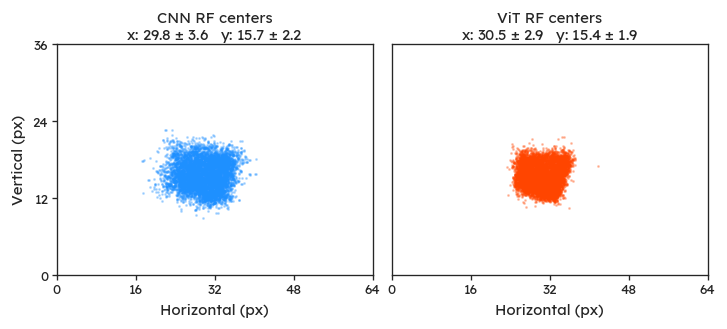

In [71]:
cnn_x, cnn_y = load_centers(cnn_popts)
vit_x, vit_y = load_centers(vit_popts)

tick_fontsize, label_fontsize, title_fontsize = 8, 9, 10
figure, axes = plt.subplots(
    nrows=1,
    ncols=2,
    gridspec_kw={"wspace": 0.06, "hspace": 0.0},
    figsize=(7, 2.5),
    dpi=120,
)


axes[0].scatter(x=cnn_x, y=cnn_y, s=2, marker=".", alpha=0.3, color="dodgerblue")
axes[1].scatter(x=vit_x, y=vit_y, s=2, marker=".", alpha=0.3, color="orangered")

cnn_title = "CNN RF centers\n"
cnn_title += rf"x: {np.mean(cnn_x):.01f} $\pm$ {np.std(cnn_x):.01f}   "
cnn_title += rf"y: {np.mean(cnn_y):.01f} $\pm$ {np.std(cnn_y):.01f}"
axes[0].set_title(cnn_title, fontsize=label_fontsize, y=0.975)

vit_title = "ViT RF centers\n"
vit_title += rf"x: {np.mean(vit_x):.01f} $\pm$ {np.std(vit_x):.01f}   "
vit_title += rf"y: {np.mean(vit_y):.01f} $\pm$ {np.std(vit_y):.01f}"
axes[1].set_title(vit_title, fontsize=label_fontsize, y=0.975)

x_range = np.linspace(0, IMAGE_SIZE[2], 5)
y_range = np.linspace(0, IMAGE_SIZE[1], 4)

tensorboard.set_xticks(
    axis=axes[0],
    ticks_loc=x_range,
    ticks=x_range.astype(int),
    label="Horizontal (px)",
    tick_fontsize=tick_fontsize,
    label_fontsize=label_fontsize,
)
tensorboard.set_yticks(
    axis=axes[0],
    ticks_loc=y_range,
    ticks=y_range.astype(int),
    label="Vertical (px)",
    tick_fontsize=tick_fontsize,
    label_fontsize=label_fontsize,
)

tensorboard.set_xticks(
    axis=axes[1],
    ticks_loc=x_range,
    ticks=x_range.astype(int),
    label="Horizontal (px)",
    tick_fontsize=tick_fontsize,
    label_fontsize=label_fontsize,
)
axes[1].set_yticks([])
axes[1].set_ylim(0, IMAGE_SIZE[1])

filename = os.path.join("plots", "RF_centers.jpg")
tensorboard.save_figure(figure, filename=filename, dpi=240, close=False)

plt.show()
plt.close(figure)

## Plot CNN and ViT Gaussian standard deviations

In [ ]:
def load_sigmas(popts: np.ndarray):
    x, y = popts[:, 3], popts[:, 4]
    x, y = x[~np.isnan(x)], y[~np.isnan(y)]
    return x, y

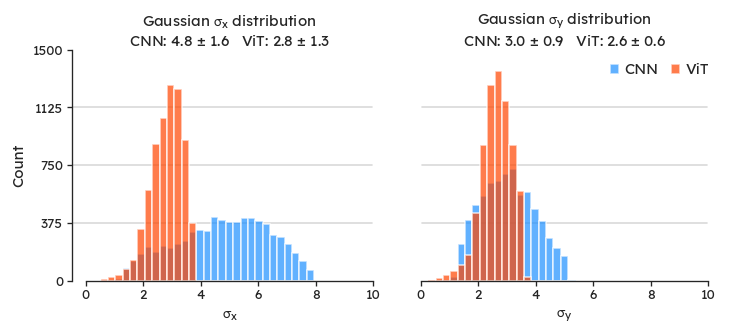

In [81]:
cnn_sigma_x, cnn_sigma_y = load_sigmas(cnn_popts)
vit_sigma_x, vit_sigma_y = load_sigmas(vit_popts)

tick_fontsize, label_fontsize, title_fontsize = 8, 9, 10
figure, axes = plt.subplots(
    nrows=1,
    ncols=2,
    gridspec_kw={"wspace": 0.06, "hspace": 0.0},
    figsize=(7, 2.5),
    dpi=120,
)
alpha = 0.7
x_max = 10
bins = np.linspace(0, x_max, 40)

axes[0].hist(cnn_sigma_x, bins=bins, alpha=alpha, color="dodgerblue", label="CNN")
axes[0].hist(vit_sigma_x, bins=bins, alpha=alpha, color="orangered", label="ViT")

axes[1].hist(cnn_sigma_y, bins=bins, alpha=alpha, color="dodgerblue", label="CNN")
axes[1].hist(vit_sigma_y, bins=bins, alpha=alpha, color="orangered", label="ViT")

title1 = r"Gaussian $\sigma_x$ distribution" + "\n"
title1 += rf"CNN: {np.mean(cnn_sigma_x):.01f} $\pm$ {np.std(cnn_sigma_x):.01f}   "
title1 += rf"ViT: {np.mean(vit_sigma_x):.01f} $\pm$ {np.std(vit_sigma_x):.01f}"
axes[0].set_title(title1, fontsize=label_fontsize, y=0.975)

title2 = r"Gaussian $\sigma_y$ distribution" + "\n"
title2 += rf"CNN: {np.mean(cnn_sigma_y):.01f} $\pm$ {np.std(cnn_sigma_y):.01f}   "
title2 += rf"ViT: {np.mean(vit_sigma_y):.01f} $\pm$ {np.std(vit_sigma_y):.01f}"
axes[1].set_title(title2, fontsize=label_fontsize, y=0.975)

axes[1].legend(
    loc="upper right",
    ncols=2,
    frameon=False,
    handletextpad=0.35,
    handlelength=0.6,
    markerscale=0.8,
    columnspacing=0.85,
    fontsize=label_fontsize,
)

x_range = np.linspace(0, x_max, 6)
y_max = 1500
y_range = np.linspace(0, y_max, 5)

tensorboard.set_xticks(
    axis=axes[0],
    ticks_loc=x_range,
    ticks=x_range.astype(int),
    label=r"$\sigma_x$",
    tick_fontsize=tick_fontsize,
    label_fontsize=label_fontsize,
)
tensorboard.set_yticks(
    axis=axes[0],
    ticks_loc=y_range,
    ticks=y_range.astype(int),
    label="Count",
    tick_fontsize=tick_fontsize,
    label_fontsize=label_fontsize,
)

tensorboard.set_xticks(
    axis=axes[1],
    ticks_loc=x_range,
    ticks=x_range.astype(int),
    label=r"$\sigma_y$",
    tick_fontsize=tick_fontsize,
    label_fontsize=label_fontsize,
)
axes[1].set_yticks([])
axes[1].set_ylim(0, y_max)

sns.despine(ax=axes[0], top=True, right=True, trim=True)
sns.despine(ax=axes[1], top=True, right=True, left=True, trim=True)

# plot y-axis grid lines
for y_value in y_range:
    if 0 < y_value < y_max:
        axes[0].axhline(
            y_value, xmax=0.95, color="gray", alpha=0.3, linewidth=1, zorder=0
        )
        axes[1].axhline(
            y_value,
            xmin=0.05,
            xmax=0.95,
            color="gray",
            alpha=0.3,
            linewidth=1,
            zorder=0,
        )


filename = os.path.join("plots", "RF_sigmas.jpg")
tensorboard.save_figure(figure, filename=filename, dpi=240, close=False)

plt.show()
plt.close(figure)